# **K-means clustering Visualization**
In this example we are going to use **Iris dataset** to predict the optimum numbers of clusters and represent them visually.

### **Name: Muhammad Waqar Gul**
***The Sparks Foundation***

In [1]:
#importing useful libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# **Data Analysis**

In [3]:
#reading data
data=pd.read_csv('/content/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#data shape
data.shape

(150, 6)

In [ ]:
#data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
#data statistical info
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
#dropping labels column
data.drop('Species',axis=1,inplace=True)

# **Finding optimum numbers of clusters**
To determine the optimum numbers of clusters, I will use elbow method. It has no of clusters on x axis and within-clusters-sum-of-squares(WCSS),also known as inertia, on y axis. WCSS is actally the sum of squared distance between each data point and its cluster. 

In [7]:
#calculating and appending each cluster's inertia to wcss.
wcss=[]
for i in range(1,15):
  model=KMeans(n_clusters=i,init='k-means++')
  model.fit(data)
  inertia=model.inertia_
  wcss.append(inertia)



The part of the graph where the elbow shape is seen, indicates the optimum number of clusters the data has. In this case, the elbow can be seen where the no of clusters is 3, so the data has 3 clusters.

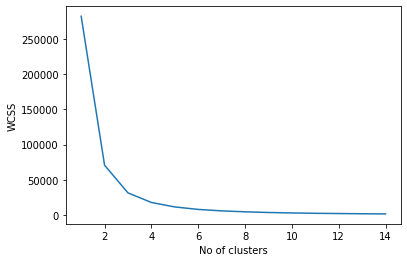

In [9]:
#plotting wcss
plt.plot(range(1,15),wcss)
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


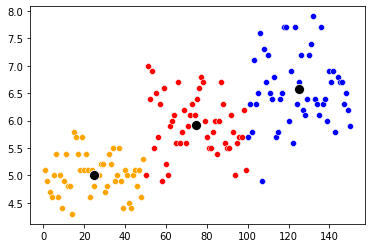

In [10]:
# Visualizing the number of clusters using seaborn
model=KMeans(n_clusters=3)
y_kmeans=model.fit_predict(data)
sns.scatterplot(x=data.values[y_kmeans == 0, 0],y=data.values[y_kmeans == 0, 1], color='red')     #plots datapoints
sns.scatterplot(x=data.values[y_kmeans == 1, 0],y=data.values[y_kmeans == 1, 1], color='blue')    #plots datapoints
sns.scatterplot(x=data.values[y_kmeans == 2, 0],y=data.values[y_kmeans == 2, 1], color='orange')  #plots datapoints
sns.scatterplot(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='Black',s=100)      #plots centroids

plt.show()

**All clusters are represented from different colours. Three different colours represent three clusters. Black points here represent the centers of each cluster.**